# EDA

Lets first download the data from the kaggle website and start looking at the data contained inside.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ak0212/anxiety-and-depression-mental-health-factors")

In [2]:
import os
import pandas as pd

# get the full path to the file
full_file_path = os.path.join(path, "anxiety_depression_data.csv")

# load the data
data = pd.read_csv(full_file_path)

# display the first few rows of the data
data.head()


,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [3]:
# First I want to get the shape of the data as well as how much of the data is missing.
print(f"There are {data.shape[0]} entries in the data.")

# Now I want to get the percentage of missing data for each column.
missing_data = data.isnull().sum() / len(data) * 100

# display the percentage of missing data for each column
print(missing_data)

There are 1200 entries in the data.
Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64


We notice that 62.25% of the data is missing in the Medication_use column, and 69.50% of the data is missing in the Substance_use column. Lets go ahead and explore the data further and see if we should drop these columns.

In [4]:
# print the unique values in the Medication_use column
print(data["Medication_Use"].unique())

# print the unique values in the Substance_use column
print(data["Substance_Use"].unique())

[nan 'Occasional' 'Regular']
[nan 'Frequent' 'Occasional']


Based on the unique values, I'm lead to assume that the patients with Nan values do not use medications or
substances. So I'm going to keep these columns in the data but replace the values with None.

In [5]:
# replace the values with None
data["Medication_Use"] = data["Medication_Use"].fillna("None")
data["Substance_Use"] = data["Substance_Use"].fillna("None")

# print the unique values in the Medication_use column
print(data["Medication_Use"].unique())

# print the unique values in the Substance_use column
print(data["Substance_Use"].unique())

# Redo the analysis and make sure there is no missing data.
missing_data = data.isnull().sum() / len(data) * 100
print(missing_data)

['None' 'Occasional' 'Regular']
['None' 'Frequent' 'Occasional']
Age                              0.0
Gender                           0.0
Education_Level                  0.0
Employment_Status                0.0
Sleep_Hours                      0.0
Physical_Activity_Hrs            0.0
Social_Support_Score             0.0
Anxiety_Score                    0.0
Depression_Score                 0.0
Stress_Level                     0.0
Family_History_Mental_Illness    0.0
Chronic_Illnesses                0.0
Medication_Use                   0.0
Therapy                          0.0
Meditation                       0.0
Substance_Use                    0.0
Financial_Stress                 0.0
Work_Stress                      0.0
Self_Esteem_Score                0.0
Life_Satisfaction_Score          0.0
Loneliness_Score                 0.0
dtype: float64


Now I want to see the unique values for each categorical column.

In [6]:
data.columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 1200 non-null   o

In [7]:
# Convert Therapy to a categorical variable
data['Therapy'] = data['Therapy'].astype('object')

## Distributions of the features

Now that our "missing data" is taken care of, we can start looking at the distributions of the features.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style of the plots
sns.set_style("whitegrid")


<Axes: >

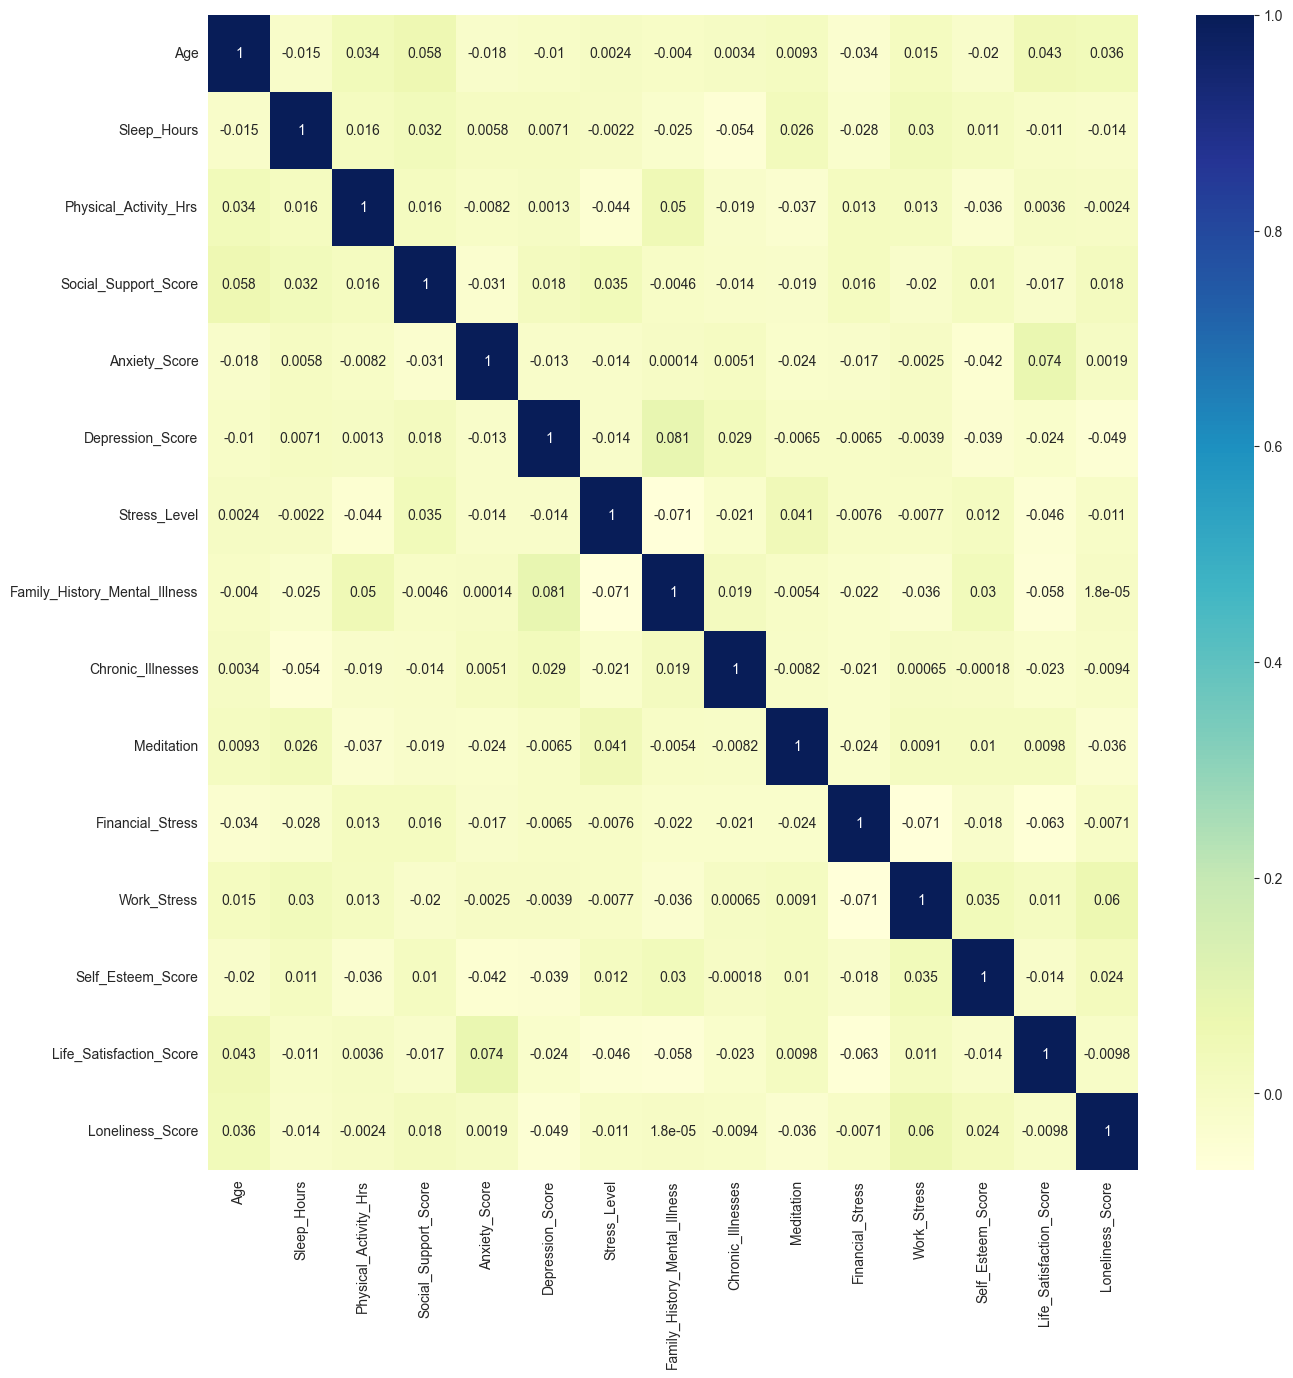

In [9]:
# Spearman correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(method="spearman"), annot=True, cmap="YlGnBu")

<Axes: >

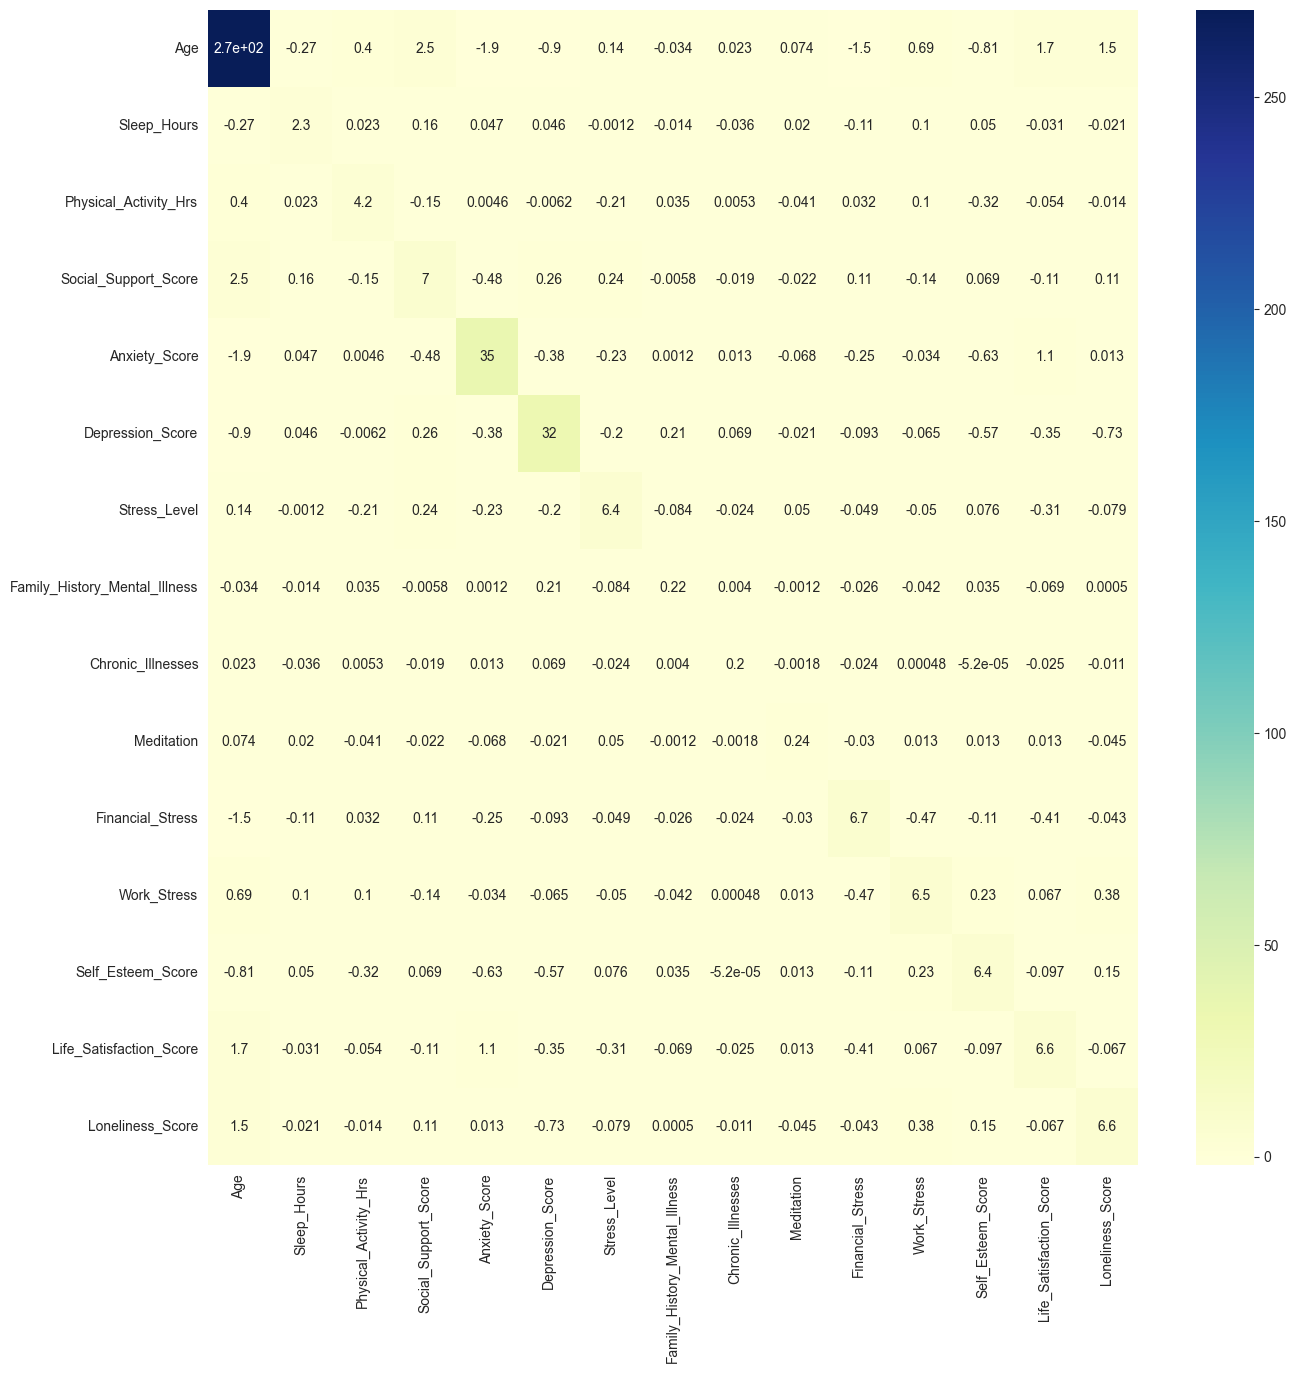

In [10]:
# Covariance matrix
plt.figure(figsize=(15, 15))
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).cov(), annot=True, cmap="YlGnBu")

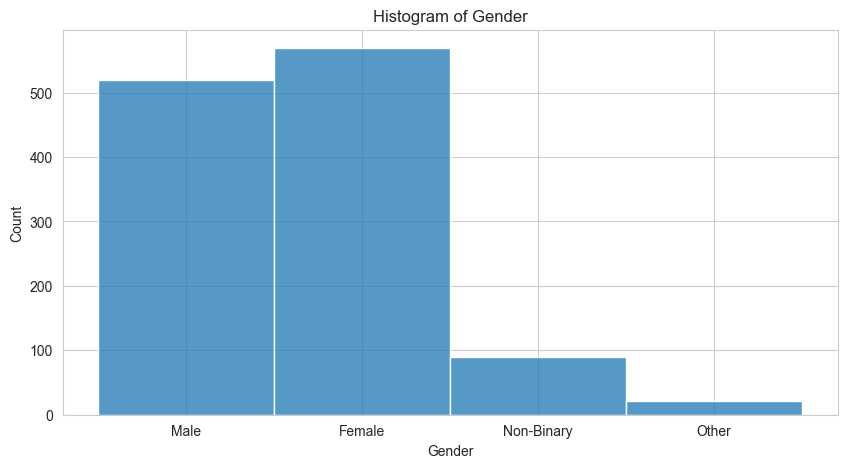

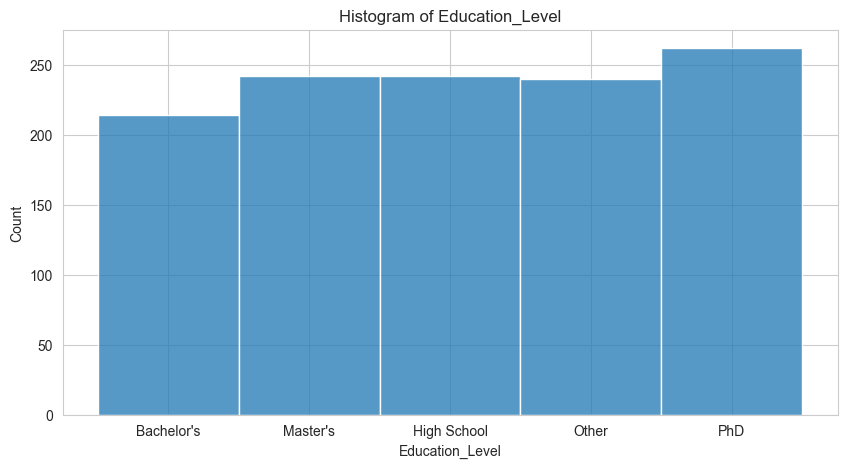

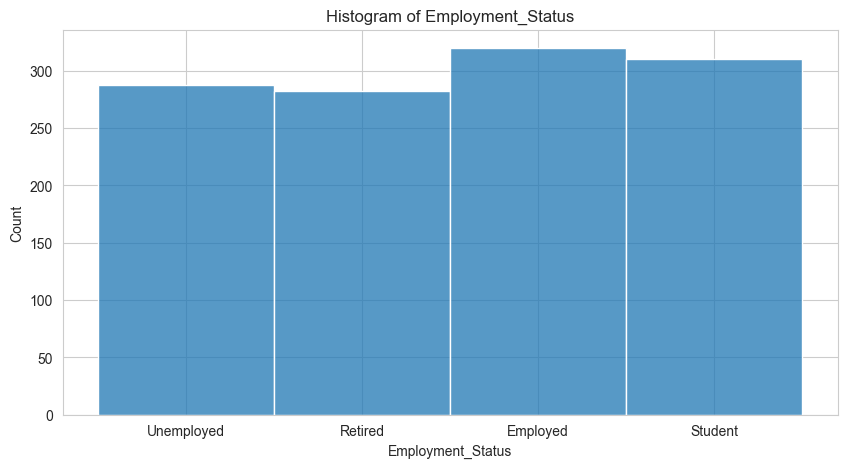

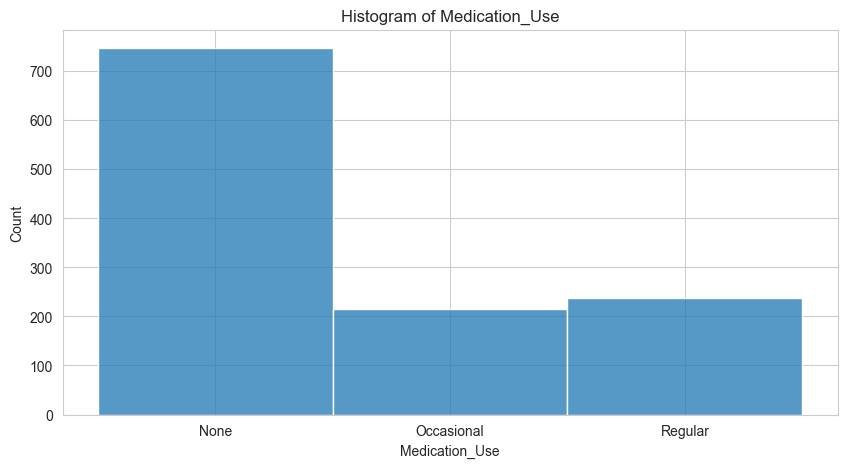

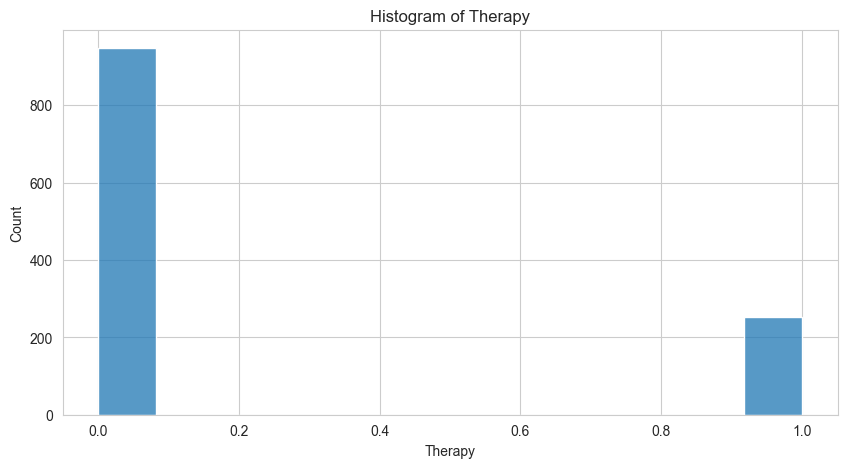

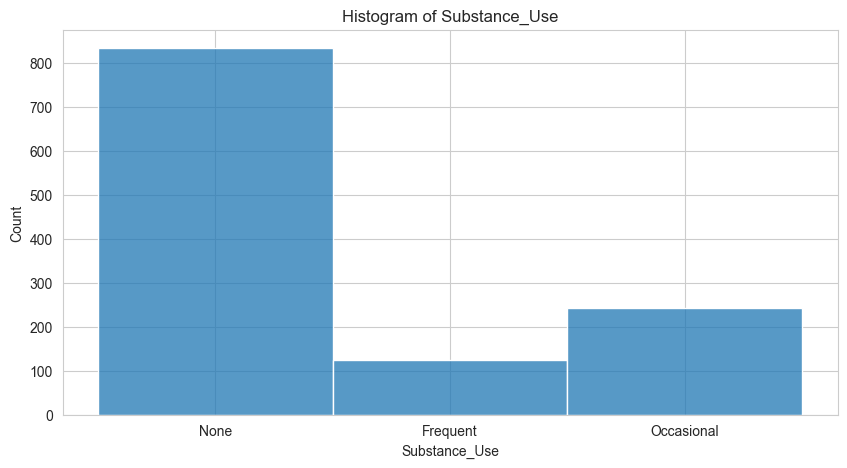

In [11]:
# histogram counts of the categorical features
for column in data.select_dtypes(include=["object"]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column])
    plt.title(f"Histogram of {column}")
    plt.show()


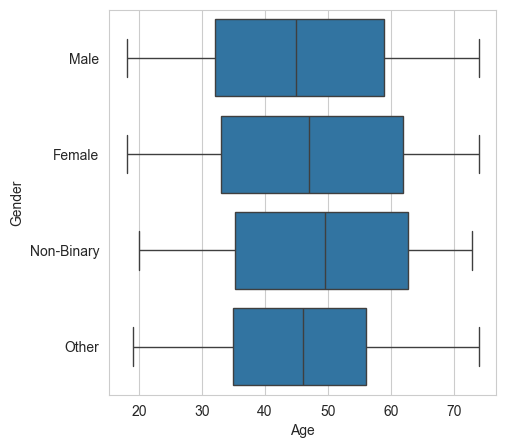

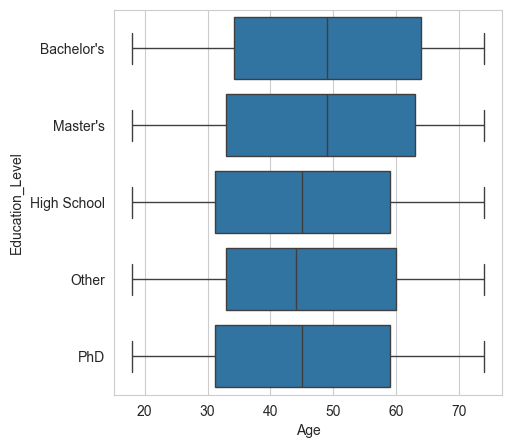

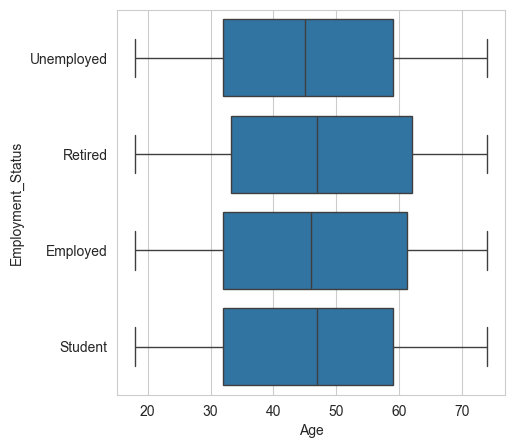

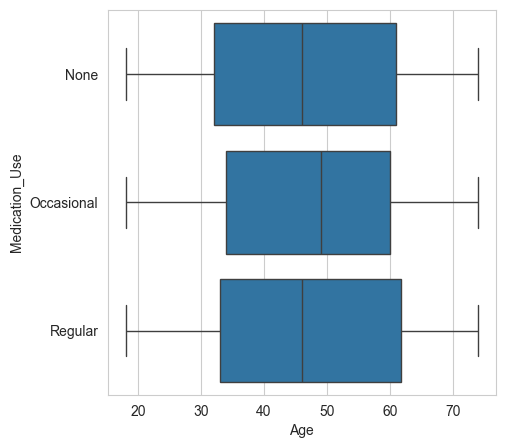

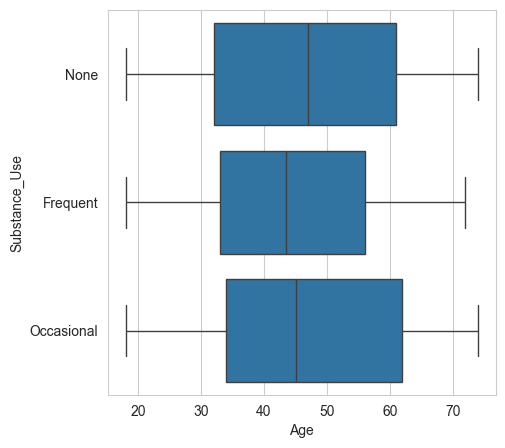

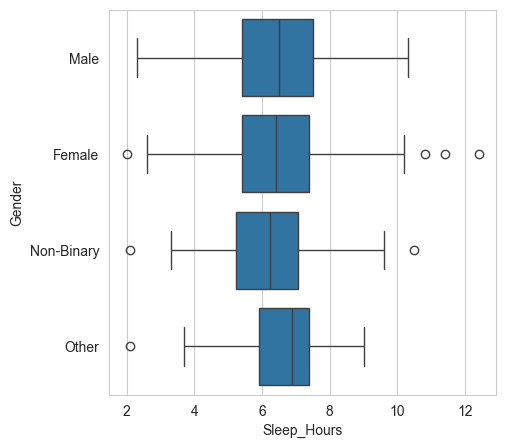

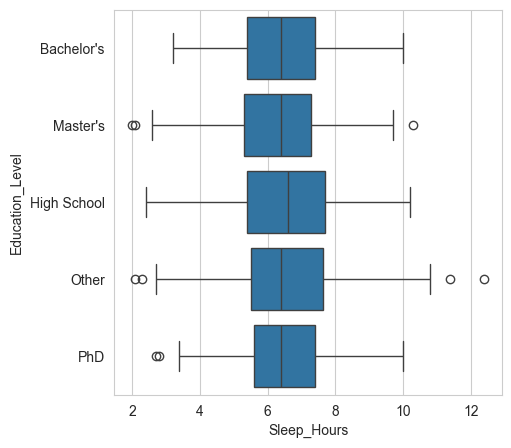

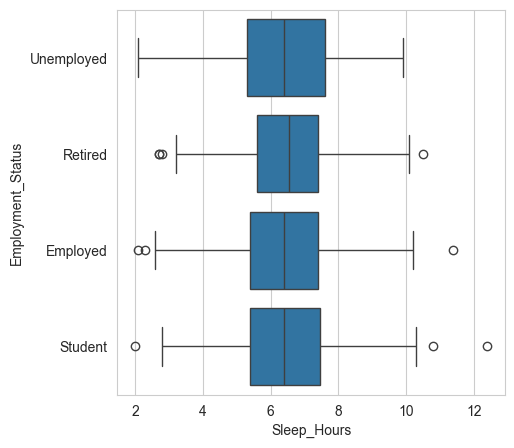

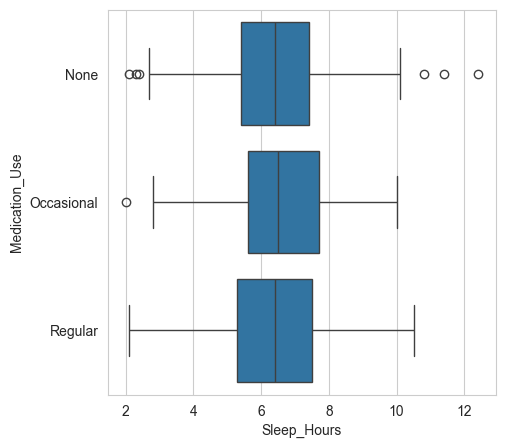

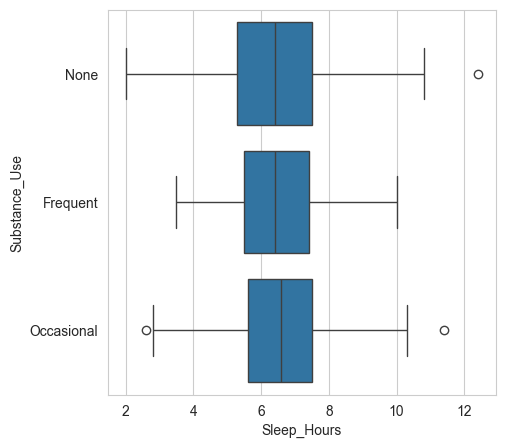

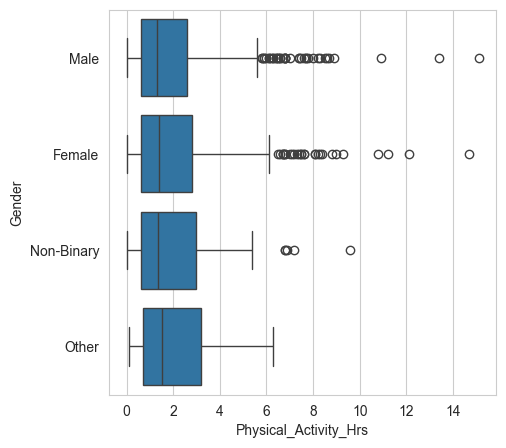

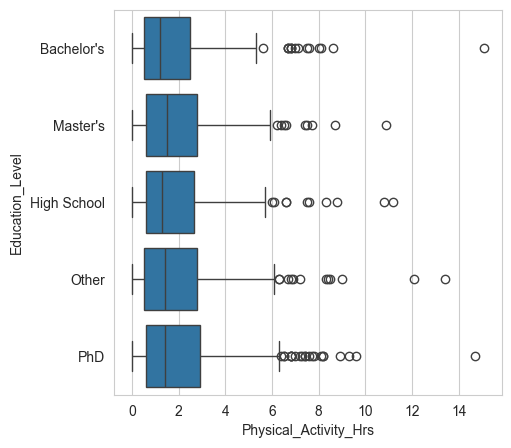

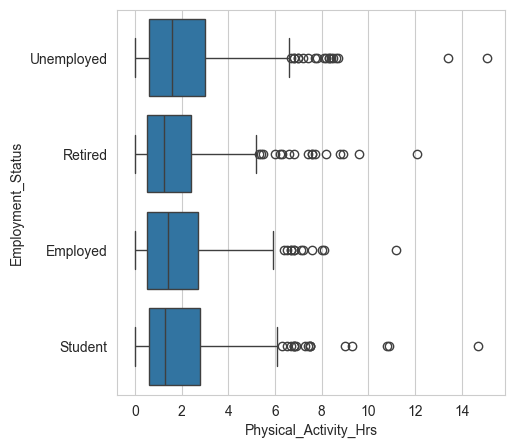

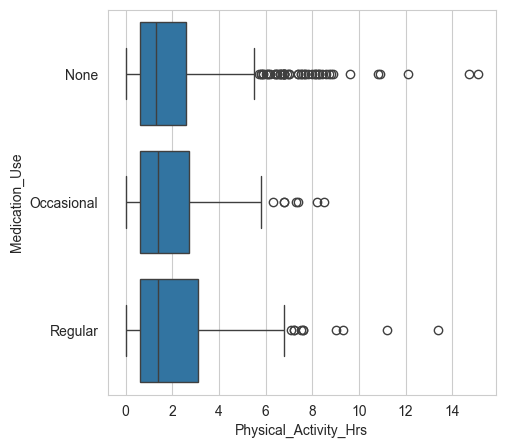

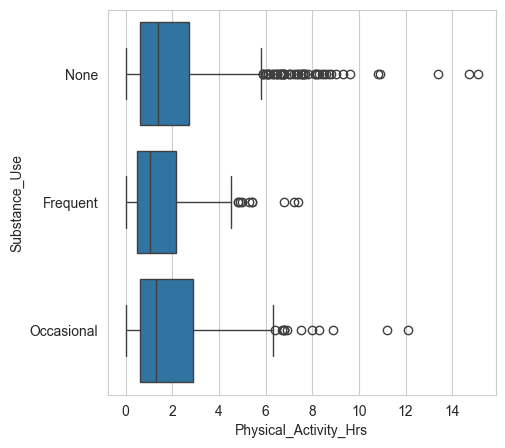

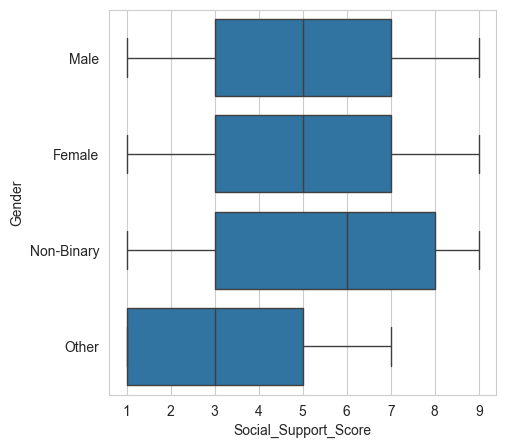

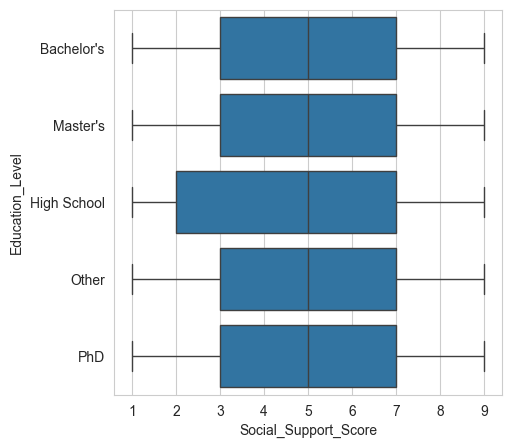

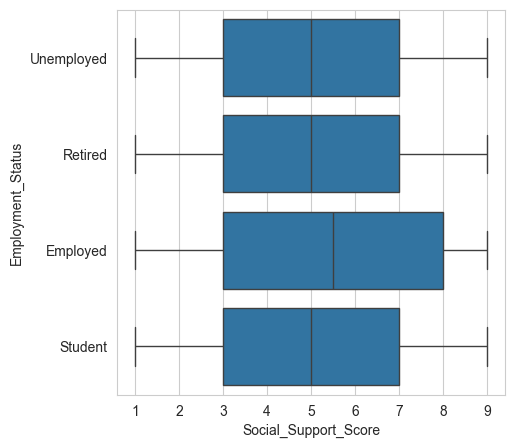

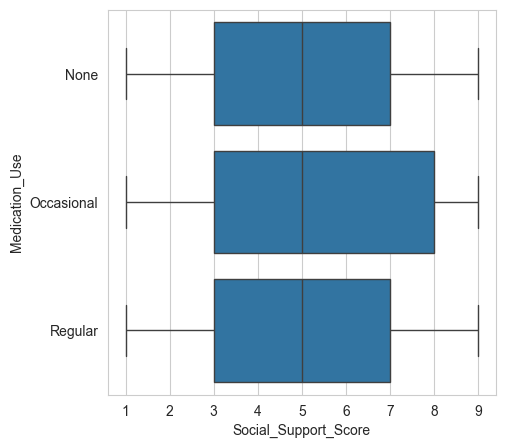

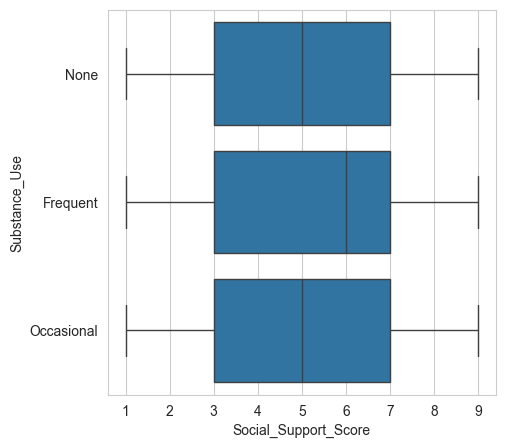

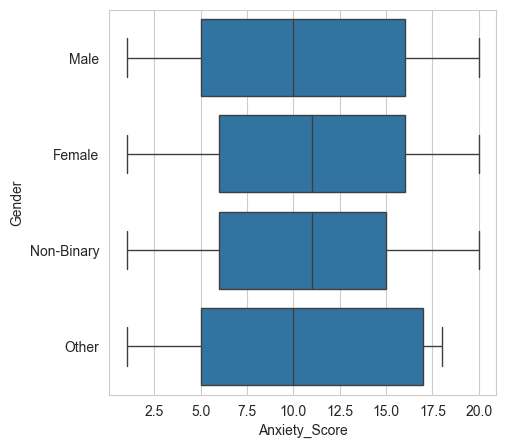

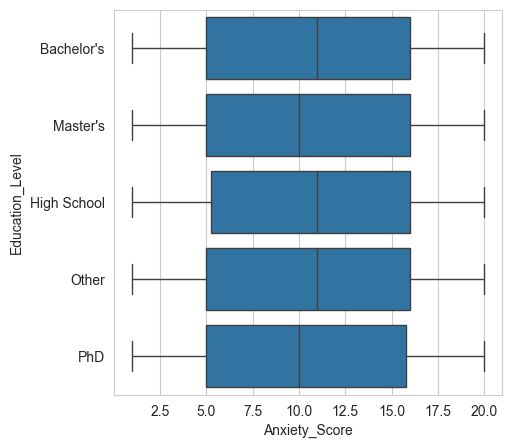

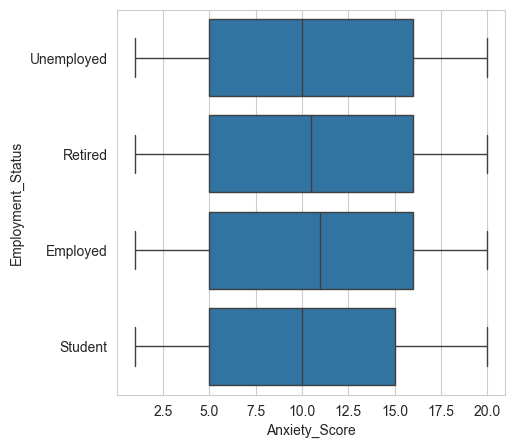

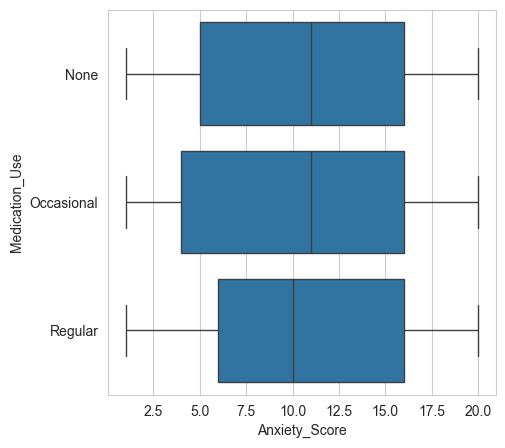

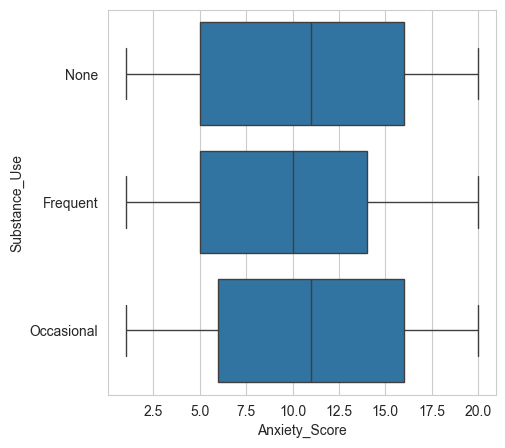

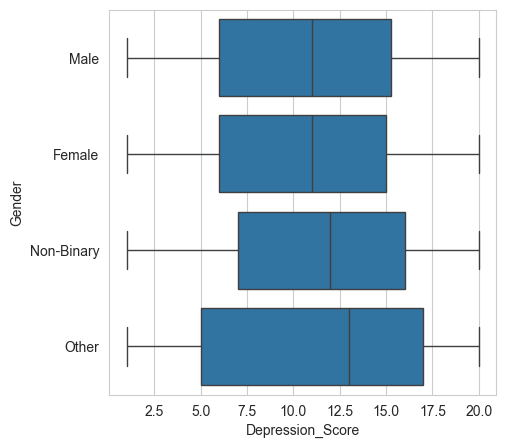

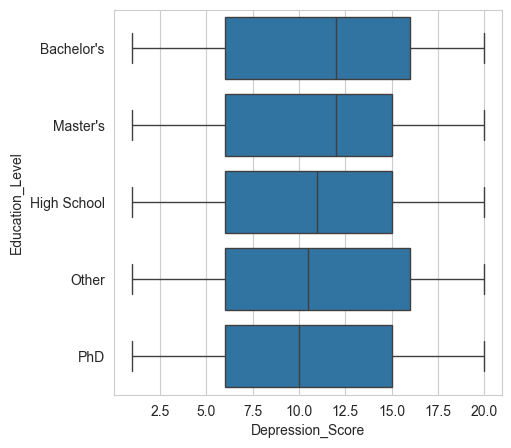

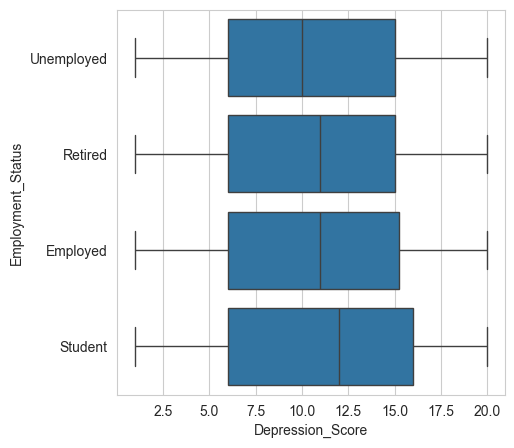

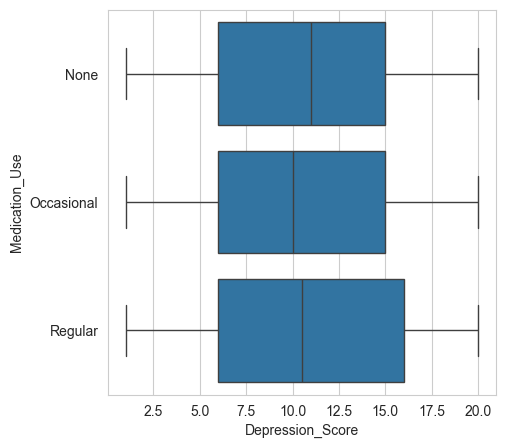

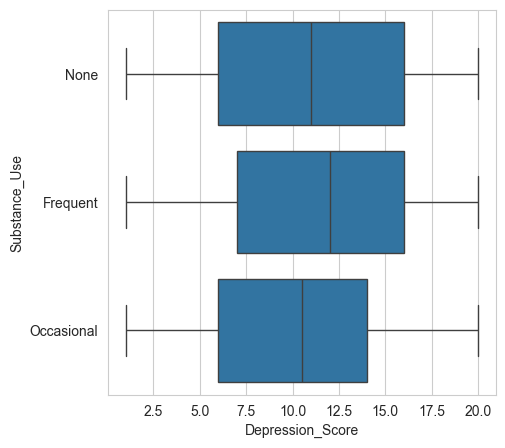

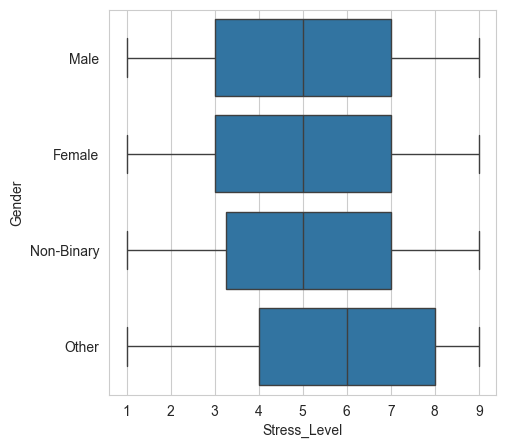

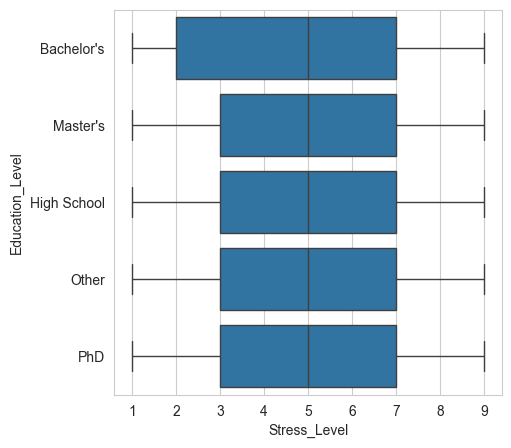

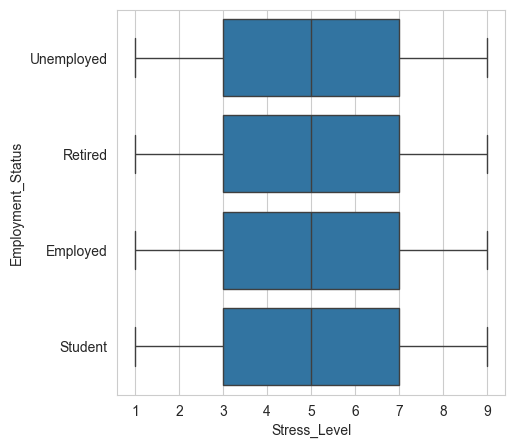

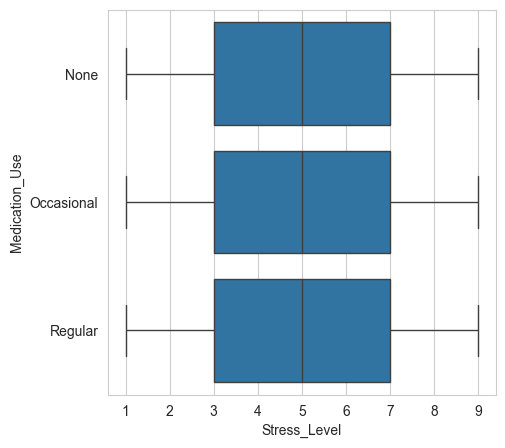

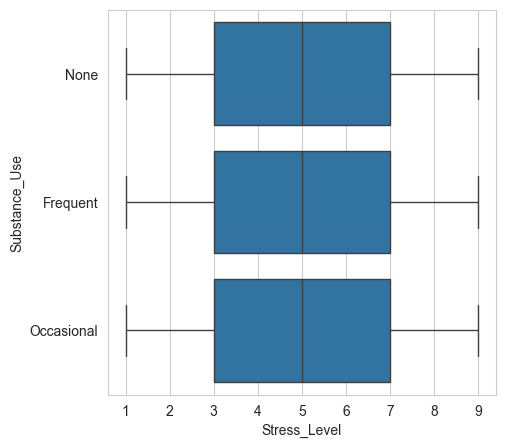

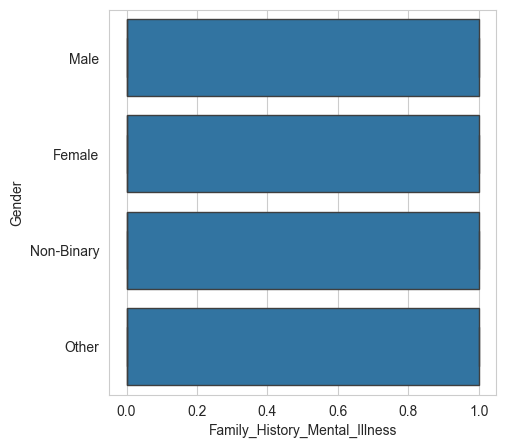

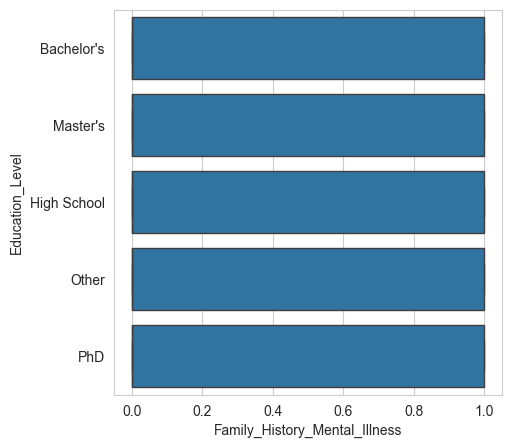

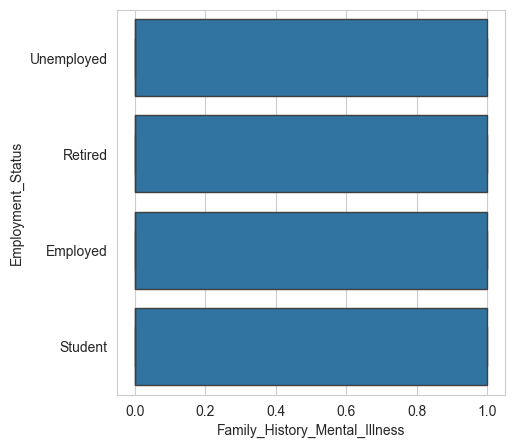

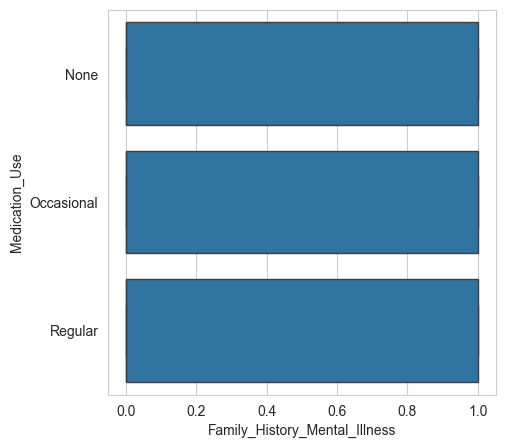

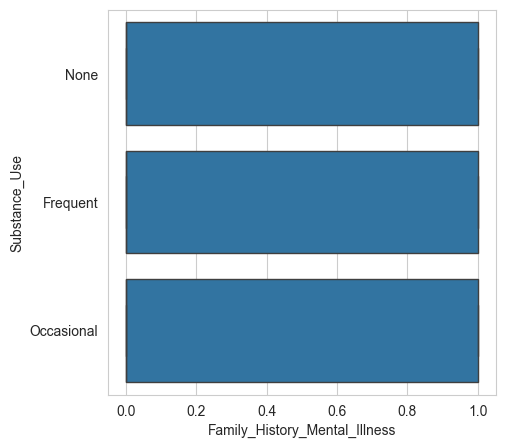

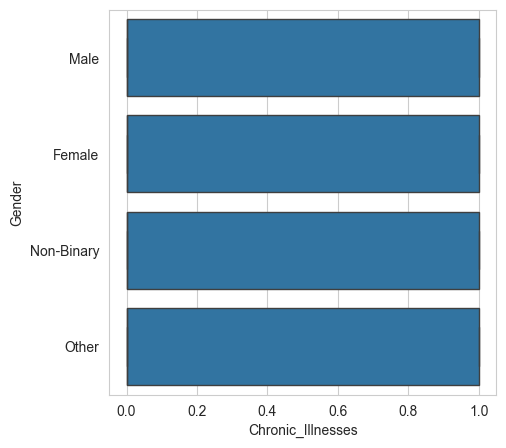

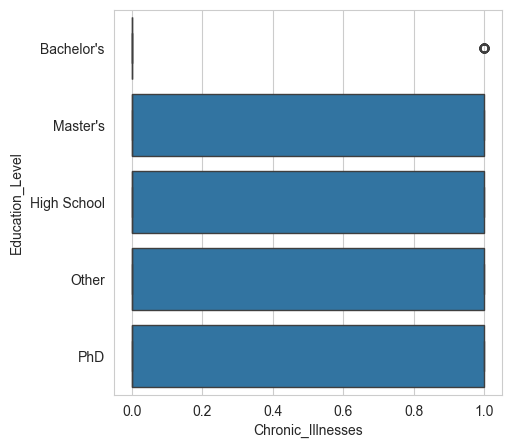

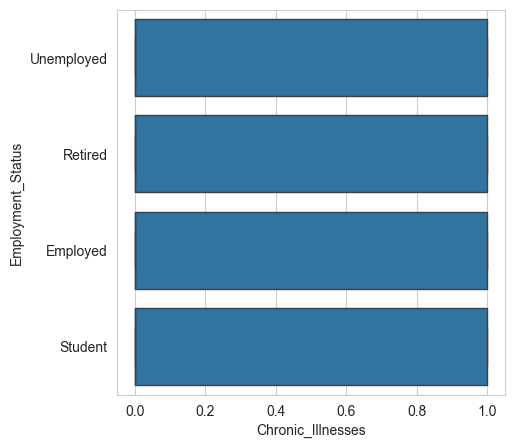

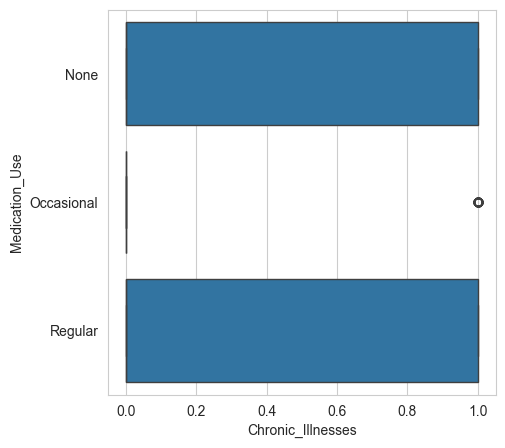

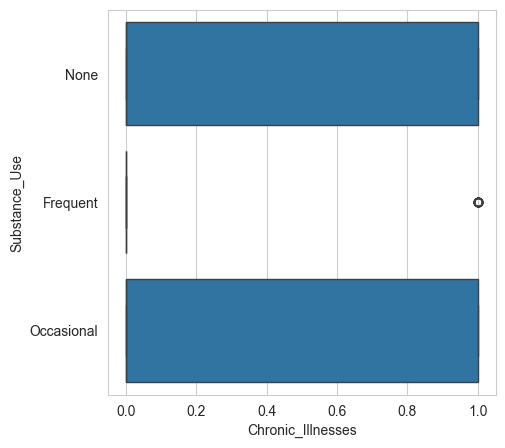

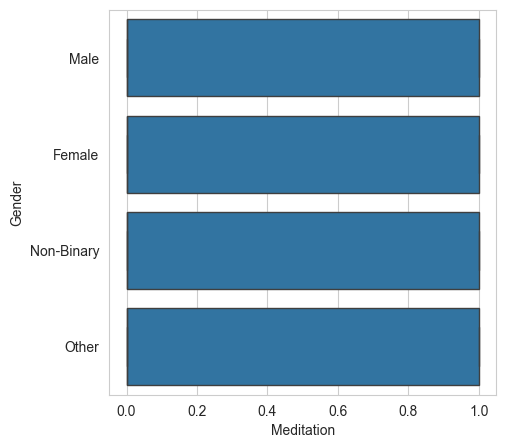

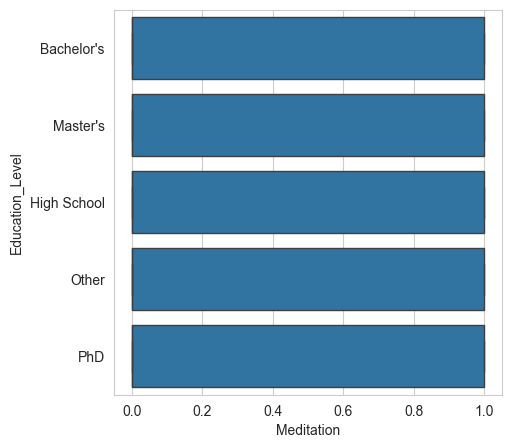

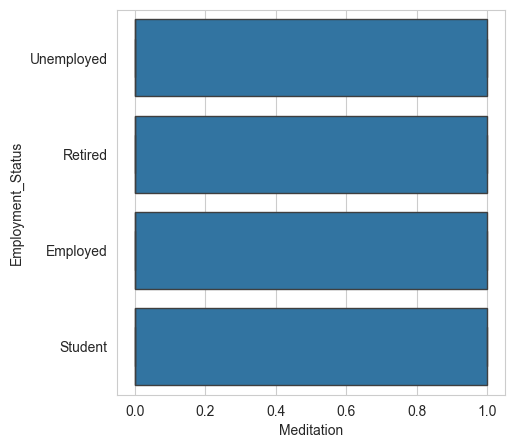

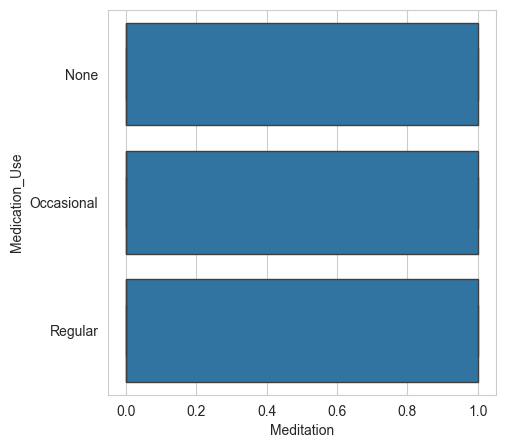

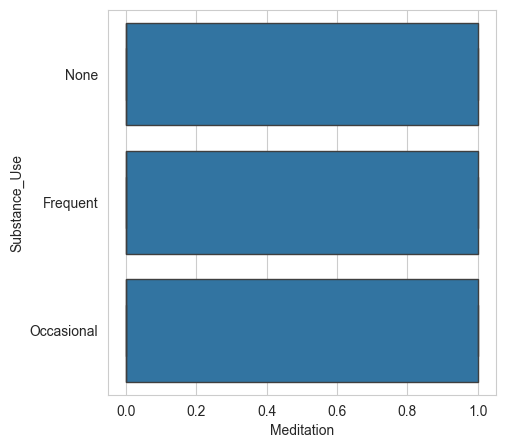

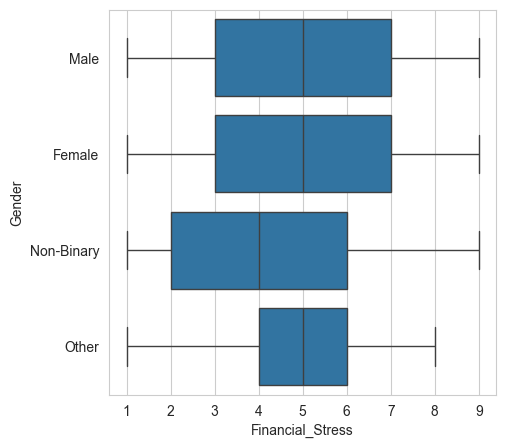

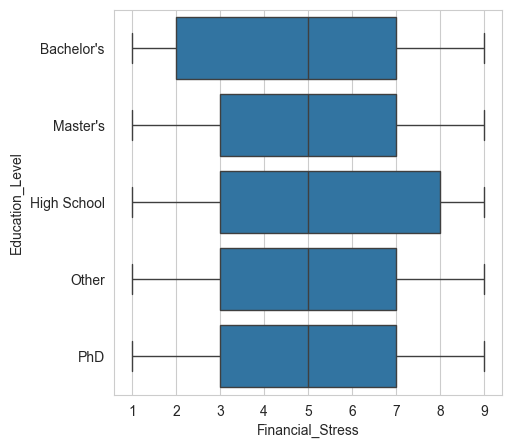

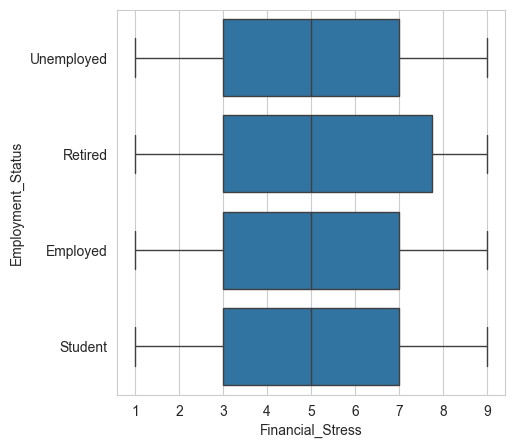

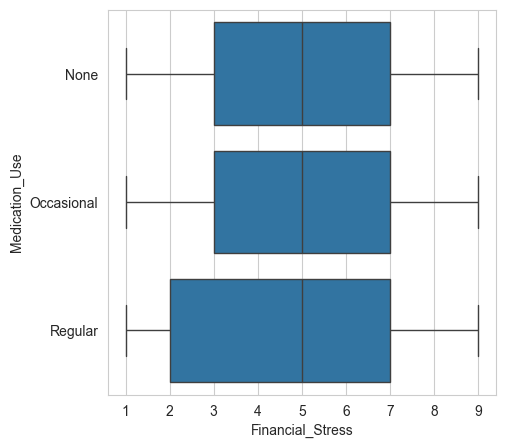

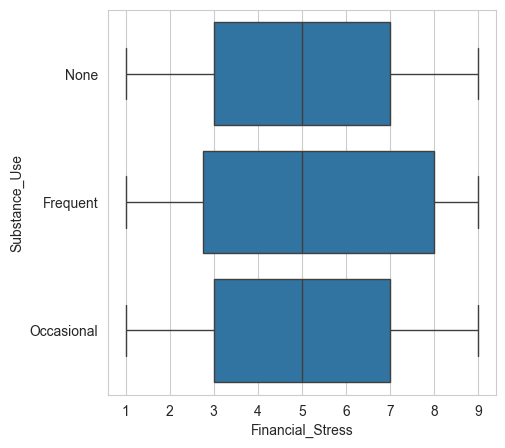

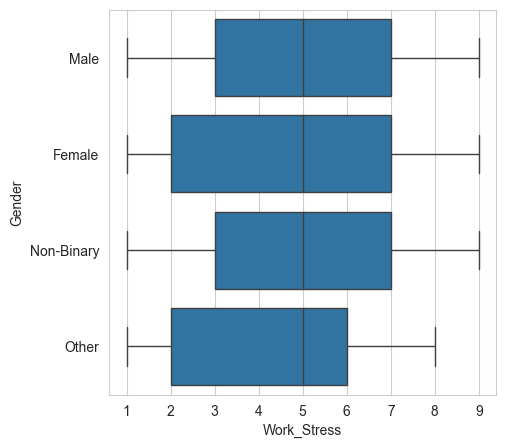

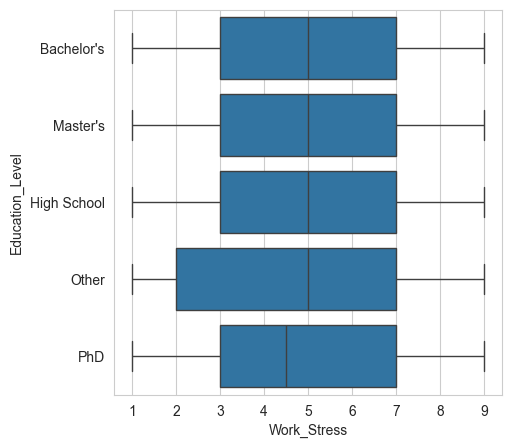

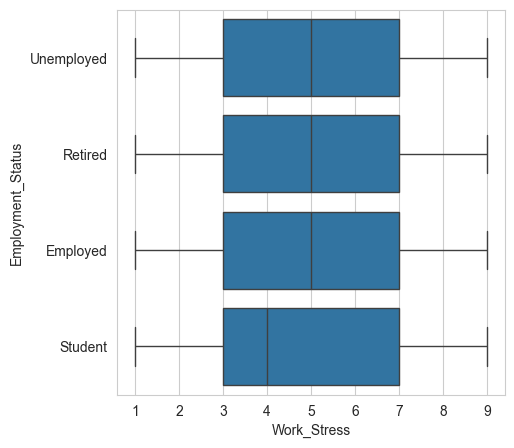

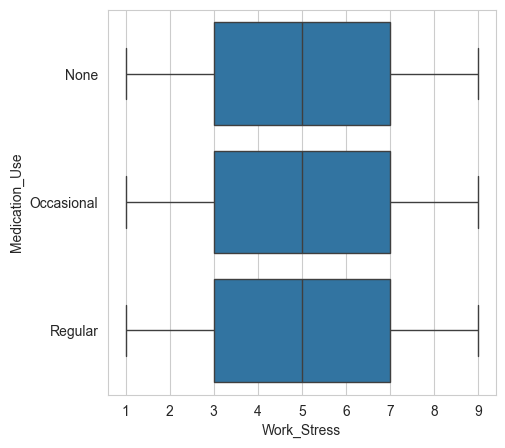

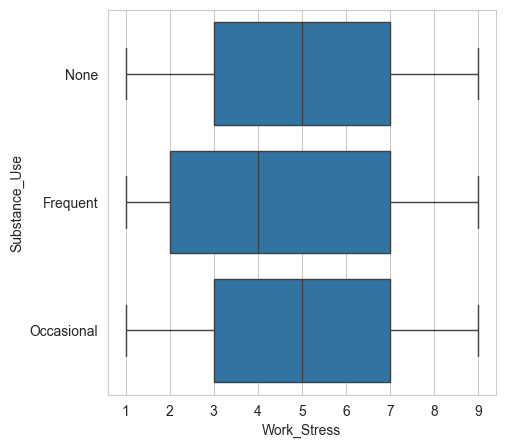

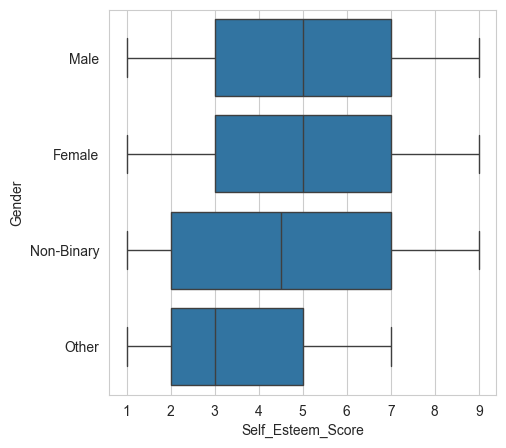

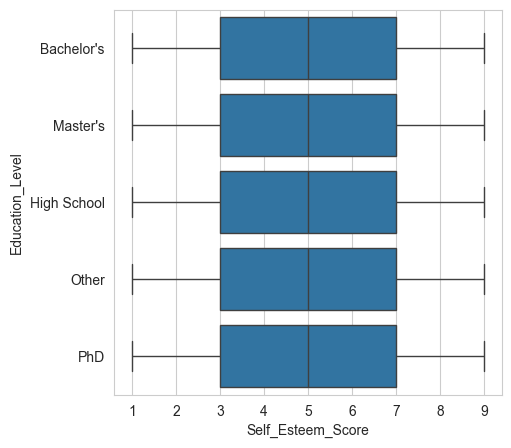

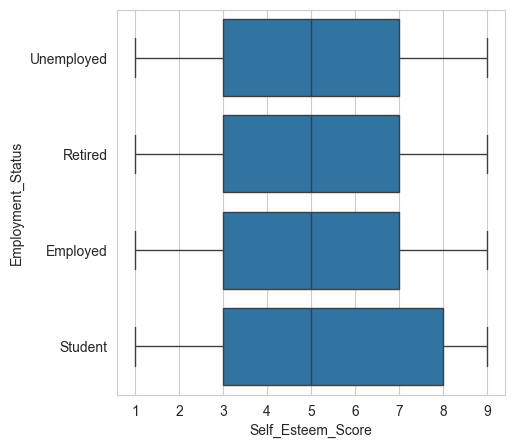

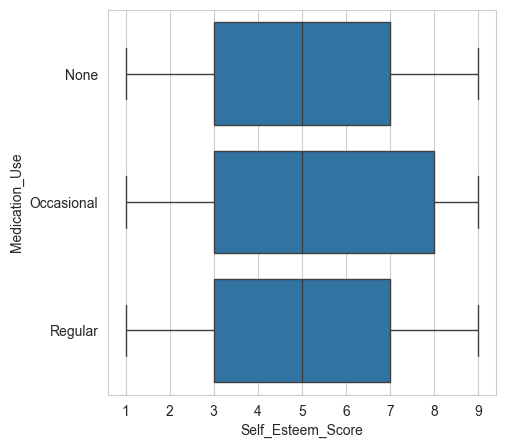

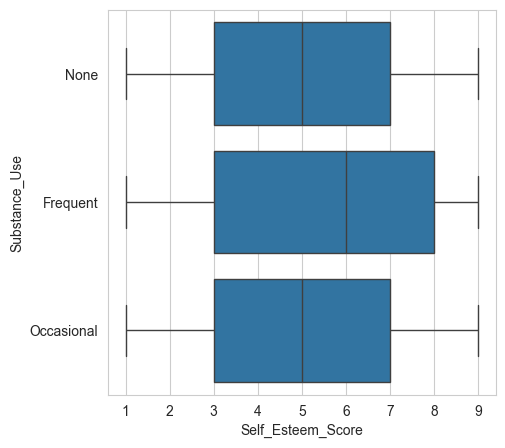

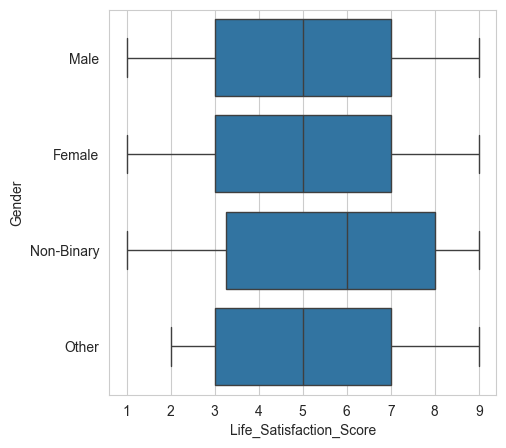

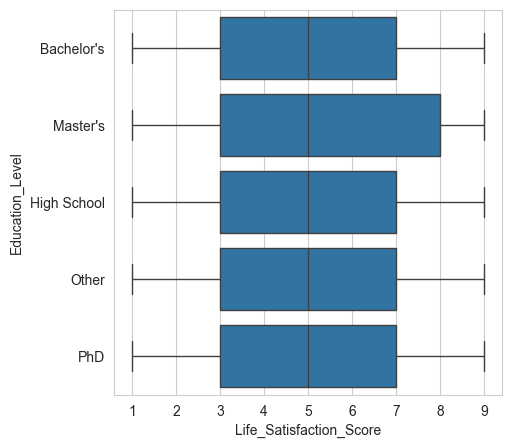

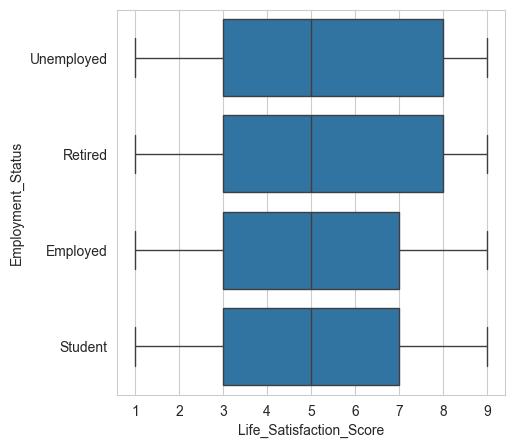

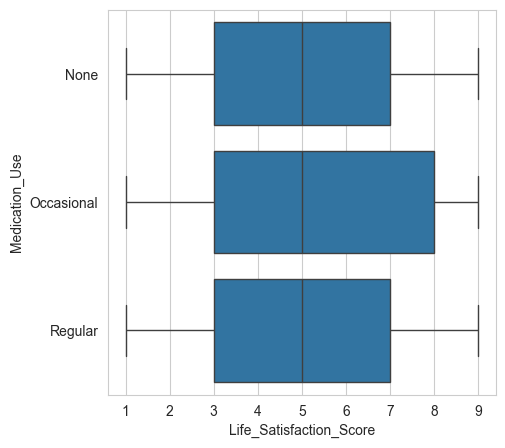

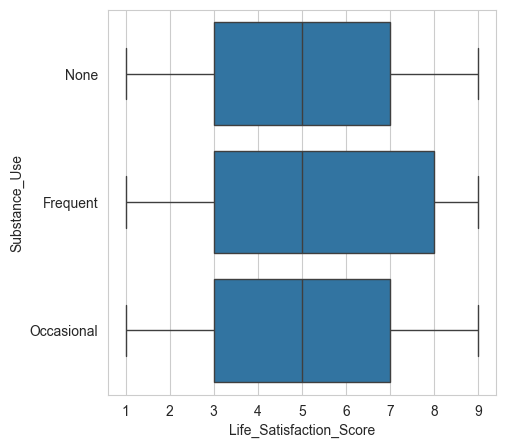

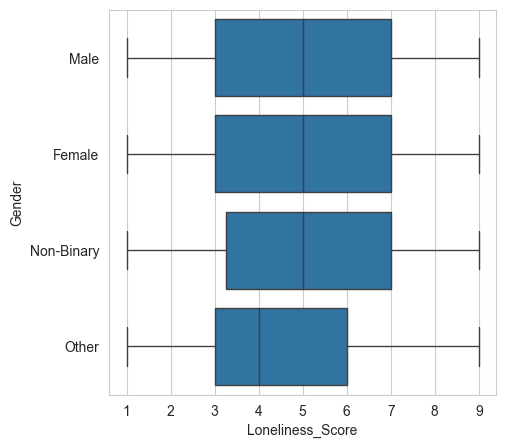

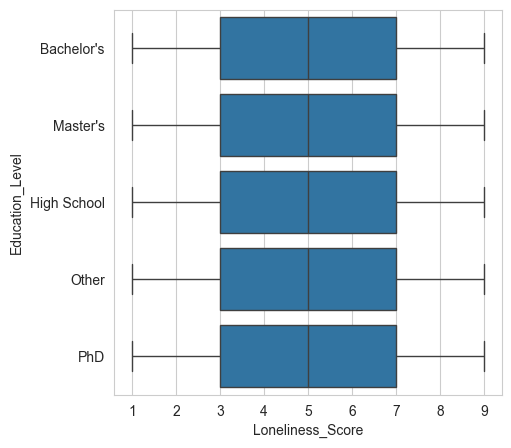

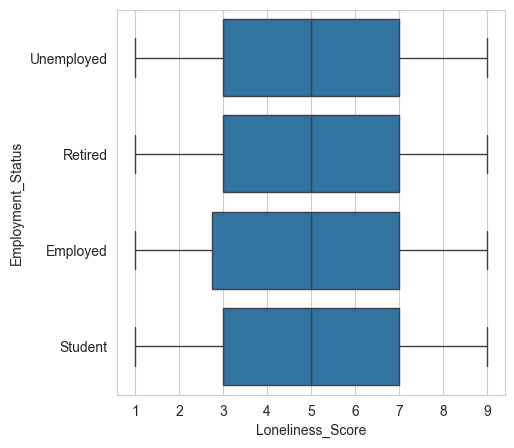

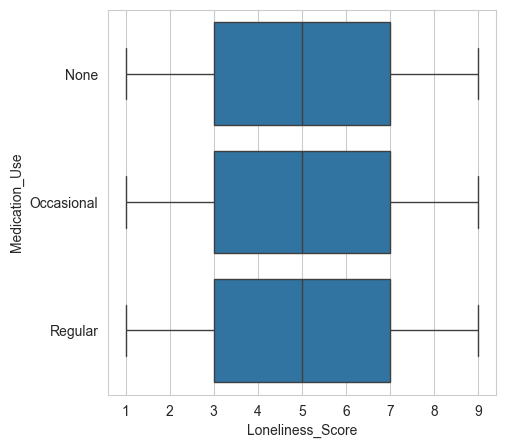

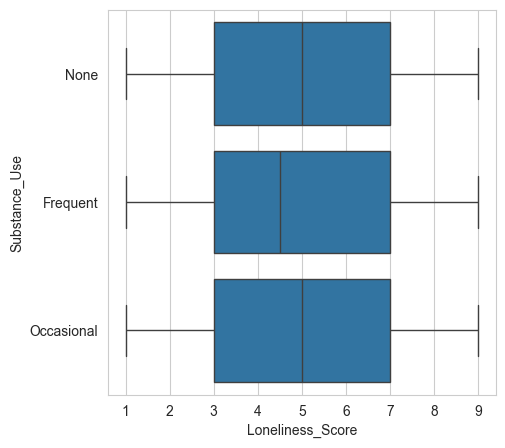

In [12]:
# Boxplots of the numerical features
for column in data.select_dtypes(include=["int64", "float64"]).columns:
    for category in data.select_dtypes(include=["object"]).columns:
        if category == 'Therapy': # Skip the therapy column because it looks really weird.
            continue
        plt.figure(figsize=(5, 5))
        sns.boxplot(data[[column, category]], x=column, y=category)
        plt.show()

# Now lets start doing some quantitative regression on the data.

In [13]:
# Separate the data into categorical and numerical columns.
categorical_columns = data.select_dtypes(include=["object"]).columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the categorical and numerical columns.
print(f"Categorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

Categorical columns: Index(['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use',
       'Therapy', 'Substance_Use'],
      dtype='object')
Numerical columns: Index(['Age', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score',
       'Anxiety_Score', 'Depression_Score', 'Stress_Level',
       'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Meditation',
       'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score',
       'Life_Satisfaction_Score', 'Loneliness_Score'],
      dtype='object')


In [14]:
# Now lets look at the unqiue values for each categorical column.
for column in categorical_columns:
    print(f"Unique values for {column}: {data[column].unique()}")

Unique values for Gender: ['Male' 'Female' 'Non-Binary' 'Other']
Unique values for Education_Level: ["Bachelor's" "Master's" 'High School' 'Other' 'PhD']
Unique values for Employment_Status: ['Unemployed' 'Retired' 'Employed' 'Student']
Unique values for Medication_Use: ['None' 'Occasional' 'Regular']
Unique values for Therapy: [0 1]
Unique values for Substance_Use: ['None' 'Frequent' 'Occasional']


Lets handle the categorical features. I'm going to convert the nominal features using one-hot encoding. The 
ordinal features will be converted using the OrdinalEncoder of sklearn.

In [15]:
# Lets handle the categorical columns. So that we can use them in the analysis.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Gender -> Nominal
gender_encoder = OneHotEncoder()
gender_encoded = gender_encoder.fit_transform(data[['Gender']]).toarray()
encoded_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(['Gender']))

# Merge onto original data
data = pd.merge(data, encoded_df, left_index=True, right_index=True)
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Other
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,None,4,3,7,5,1,0.0,1.0,0.0,0.0
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,None,1,4,7,4,6,1.0,0.0,0.0,0.0
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,None,8,7,8,1,1,1.0,0.0,0.0,0.0
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,None,7,4,8,4,4,1.0,0.0,0.0,0.0
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,Frequent,8,9,5,7,7,1.0,0.0,0.0,0.0


In [16]:
# Education -> Ordinal
education_encoder = OrdinalEncoder(categories=[[ 'Other', 'High School', "Bachelor's", "Master's", 'PhD']])
data['Education_Level'] = education_encoder.fit_transform(data[['Education_Level']])
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Other
0,56,Male,2.0,Unemployed,6.0,0.4,3,4,2,9,...,None,4,3,7,5,1,0.0,1.0,0.0,0.0
1,69,Female,2.0,Retired,8.8,2.8,6,18,7,6,...,None,1,4,7,4,6,1.0,0.0,0.0,0.0
2,46,Female,3.0,Employed,5.3,1.6,5,5,13,8,...,None,8,7,8,1,1,1.0,0.0,0.0,0.0
3,32,Female,1.0,Unemployed,8.8,0.5,4,6,3,4,...,None,7,4,8,4,4,1.0,0.0,0.0,0.0
4,60,Female,2.0,Retired,7.2,0.7,2,7,15,3,...,Frequent,8,9,5,7,7,1.0,0.0,0.0,0.0


In [17]:
# Employment_Status -> Nominal
employment_encoder = OneHotEncoder()
employment_encoded = employment_encoder.fit_transform(data[['Employment_Status']]).toarray()
employment_df = pd.DataFrame(employment_encoded, columns=employment_encoder.get_feature_names_out(['Employment_Status']))
data = pd.merge(data, employment_df, left_index=True, right_index=True)
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Life_Satisfaction_Score,Loneliness_Score,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Other,Employment_Status_Employed,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed
0,56,Male,2.0,Unemployed,6.0,0.4,3,4,2,9,...,5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69,Female,2.0,Retired,8.8,2.8,6,18,7,6,...,4,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46,Female,3.0,Employed,5.3,1.6,5,5,13,8,...,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32,Female,1.0,Unemployed,8.8,0.5,4,6,3,4,...,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,Female,2.0,Retired,7.2,0.7,2,7,15,3,...,7,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
# Medication_Use -> Ordinal
medication_encoder = OrdinalEncoder(categories=[['None', 'Occasional', 'Regular']])
data['Medication_Use'] = medication_encoder.fit_transform(data[['Medication_Use']])
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Life_Satisfaction_Score,Loneliness_Score,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Other,Employment_Status_Employed,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed
0,56,Male,2.0,Unemployed,6.0,0.4,3,4,2,9,...,5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69,Female,2.0,Retired,8.8,2.8,6,18,7,6,...,4,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46,Female,3.0,Employed,5.3,1.6,5,5,13,8,...,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32,Female,1.0,Unemployed,8.8,0.5,4,6,3,4,...,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,Female,2.0,Retired,7.2,0.7,2,7,15,3,...,7,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# Substance_Use -> Ordinal
substance_encoder = OrdinalEncoder(categories=[['None', 'Occasional', 'Frequent']])
data['Substance_Use'] = substance_encoder.fit_transform(data[['Substance_Use']])
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Life_Satisfaction_Score,Loneliness_Score,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Other,Employment_Status_Employed,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed
0,56,Male,2.0,Unemployed,6.0,0.4,3,4,2,9,...,5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69,Female,2.0,Retired,8.8,2.8,6,18,7,6,...,4,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46,Female,3.0,Employed,5.3,1.6,5,5,13,8,...,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32,Female,1.0,Unemployed,8.8,0.5,4,6,3,4,...,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,Female,2.0,Retired,7.2,0.7,2,7,15,3,...,7,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Now that we have converted our features, lets organize our data for training and testing.

In [64]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

def build_classifiers(data, target, original_numerical_columns):
    new_categorical_columns = set.difference(set(data.select_dtypes(include=["int64", "float64"]).columns), set(original_numerical_columns))
    new_categorical_columns = list(new_categorical_columns)
    new_categorical_columns

    features = list(numerical_columns) + new_categorical_columns
    features.remove(target)

    print(f"Features: {features}")
    print(f"Target: {target}")
    print()

    X_train, X_test, y_train, y_test = train_test_split(data[features], data['Anxiety_Score'], test_size=0.2, random_state=42)

    models = {
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "Naive Bayes": GaussianNB(),
        "Logistic Regression": LogisticRegression()
    }

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        print(f"{model_name:<20} F1 Score: {str(f1_score(y_test, y_pred, average='weighted'))}")

In [65]:
build_classifiers(data, 'Stress_Level', numerical_columns)

Features: ['Age', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score', 'Depression_Score', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Meditation', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score', 'Employment_Status_Retired', 'Gender_Female', 'Gender_Non-Binary', 'Medication_Use', 'Employment_Status_Employed', 'Gender_Other', 'Substance_Use', 'Employment_Status_Student', 'Gender_Male', 'Employment_Status_Unemployed', 'Education_Level']
Target: Stress_Level

Random Forest        F1 Score: 0.605072189354134
SVM                  F1 Score: 0.11835001055769029
Naive Bayes          F1 Score: 0.9916800825593396
Logistic Regression  F1 Score: 0.2689286100605685
